Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

1. Загрузите файл HR.csv в pandas dataframe

In [7]:
df = pd.read_csv('/workspaces/2025-03-24/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.mode().iloc[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

In [10]:
df.median(numeric_only=True)

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix
quant_colums = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
phik_overview = df.phik_matrix(interval_cols=quant_colums)

print(phik_overview)
#plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))
#методом phik, который рассматривали на практике, задачу визуализации решить не удалось, т.к. не получилось задать параметр, к каким колонкам нужно применять метод

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 39.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.524186        0.671192   
last_evaluation                  0.524186         1.000000        0.405454   
number_project                   0.671192         0.405454        1.000000   
average_montly_hours             0.632964         0.423943        0.520013   
time_spend_company               0.434504         0.277426        0.418083   
Work_accident                    0.126103         0.060155        0.127437   
left                             0.794751         0.445802        0.793722   
promotion_last_5years            0.048870         0.062559        0.042565   
department                       0.077827         0.065680        0.044844   
salary         

In [13]:
try:
  df_selected = df[quant_colums]
except KeyError as e:
    print(f"Ошибка: Один или несколько столбцов отсутствуют в DataFrame.  Проверьте названия столбцов.  Столбцы в df: {list(df.columns)}")
    raise e

corr = df_selected.corr()

print(corr)

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


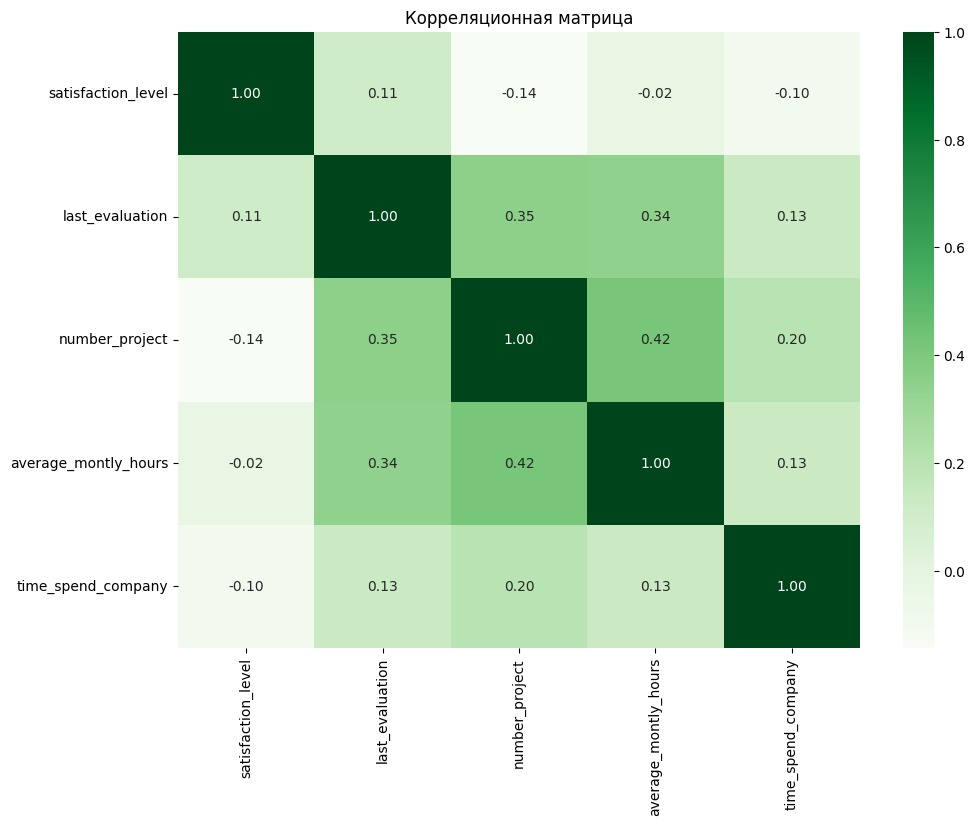

In [14]:
plt.figure(figsize=(11, 8))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f")  # fmt=".2f" для отображения только двух знаков после запятой
plt.title("Корреляционная матрица")  # Добавляем заголовок
plt.show()

In [15]:
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

abs_corr = upper_triangle.abs()
max_corr = upper_triangle.stack().loc[abs_corr.stack().nlargest(2).index]
print("\nДве самые скоррелированные переменные (по Пирсону):\n", max_corr)

min_corr = upper_triangle.stack().loc[abs_corr.stack().nsmallest(2).index]
print("\nДве наименее скоррелированные переменные (по Пирсону):\n", min_corr)


Две самые скоррелированные переменные (по Пирсону):
 number_project   average_montly_hours    0.417211
last_evaluation  number_project          0.349333
dtype: float64

Две наименее скоррелированные переменные (по Пирсону):
 satisfaction_level  average_montly_hours   -0.020048
                    time_spend_company     -0.100866
dtype: float64


4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [16]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

5. Показать распределение сотрудников по зарплатам.

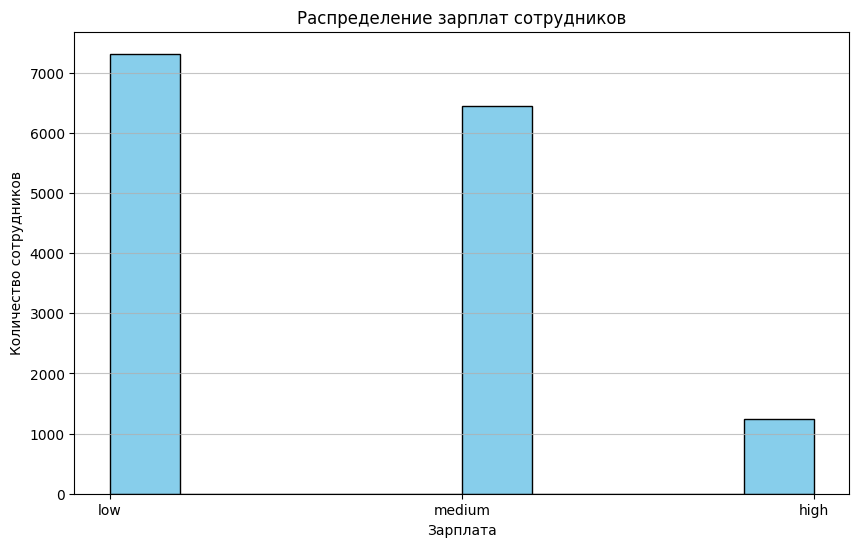

In [17]:
salaries = df['salary']

plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.hist(salaries, bins=10, color='skyblue', edgecolor='black') # Строим гистограмму
plt.title('Распределение зарплат сотрудников') # Заголовок графика
plt.xlabel('Зарплата') # Подпись оси X
plt.ylabel('Количество сотрудников') # Подпись оси Y
plt.grid(axis='y', alpha=0.75) # Добавляем сетку для лучшей читаемости

plt.show()

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [18]:
df2 = df.copy()

def salary_to_rank(salary):
    if salary == 'low':
        return 1
    elif salary == 'medium':
        return 2
    elif salary == 'high':
        return 3
    else:
        return None

df2['salary_rank'] = df2['salary'].apply(salary_to_rank)

salary_distribution = df2.groupby(['department', 'salary']).size().unstack(fill_value=0)

# Альтернативный вариант с pivot_table
#salary_distribution = df2.pivot_table(index='department', columns='salary', aggfunc='size', fill_value=0)

print(salary_distribution)

# если нужно в процентах
#salary_distribution_percentage = salary_distribution.div(salary_distribution.sum(axis=1), axis=0) * 100
#print("\nРаспределение зарплат по департаментам (в процентах):")
#print(salary_distribution_percentage)

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


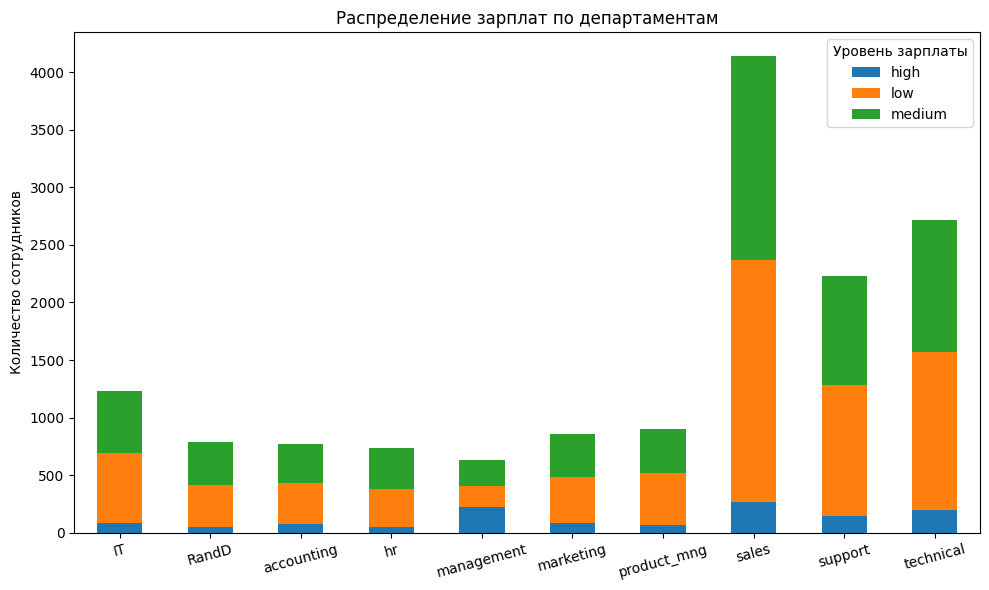

In [19]:
salary_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Распределение зарплат по департаментам')
plt.xlabel('')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=15)  # Чтобы названия департаментов отображались горизонтально
plt.legend(title='Уровень зарплаты')
plt.tight_layout() # Чтобы избежать перекрытия элементов графика
plt.show()

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [20]:
#per_1 = df['average_montly_hours'].value_counts()
#задать список с average_montly_hours и per_1
#s = [df['salary'], per_1]
df3 = df.groupby(['salary'])['average_montly_hours'].mean().reset_index()
df3

,salary,average_montly_hours
0,high,199.867421
1,low,200.996583
2,medium,201.338349


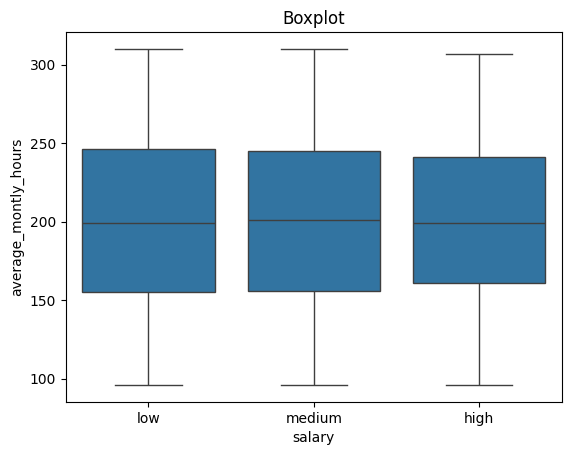

In [21]:
sns.boxplot(data=df, x='salary', y='average_montly_hours');
plt.title("Boxplot");

In [22]:
def check_normality(data: pd.Series, alpha: float = 0.05) -> None:
  statistic, p_value = st.shapiro(data)

  print(f"Статистика теста Шапиро-Уилка: {statistic:.3f}")
  print(f"P-значение: {p_value:.3f}")

  if p_value > alpha: # условие статистической значимости
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
  else:
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [23]:
df_high = df[df['salary'] == 'high']
df_low = df[df['salary'] == 'low']

check_normality(df_high['average_montly_hours'])
check_normality(df_low['average_montly_hours'])

Статистика теста Шапиро-Уилка: 0.971
P-значение: 0.000
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Статистика теста Шапиро-Уилка: 0.960
P-значение: 0.000
Не отклоняем нулевую гипотезу >> Данные распределены нормально


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7316.
  res = hypotest_fun_out(*samples, **kwds)


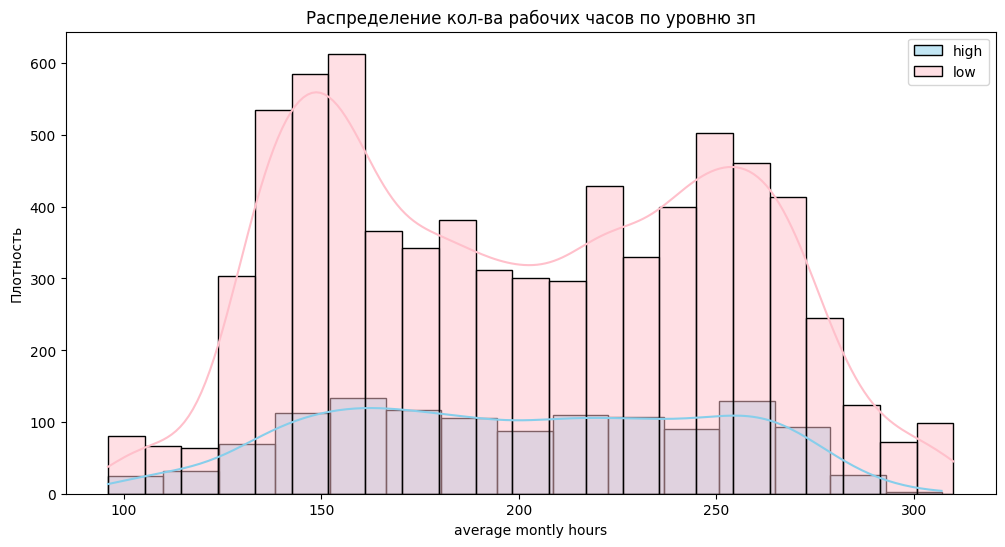

In [24]:
plt.figure(figsize=(12, 6))

sns.histplot(df_high['average_montly_hours'], color="skyblue", label="high", kde=True)
sns.histplot(df_low['average_montly_hours'], color="pink", label="low", kde=True)

plt.title("Распределение кол-ва рабочих часов по уровню зп")
plt.xlabel("average montly hours")
plt.ylabel("Плотность")
plt.legend()
plt.show()

In [25]:
stat, p = st.levene(df_high['average_montly_hours'], df_low['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")
else:
    print("Отклоняем нулевую гипотезу >> Вариация в группах различается")

Статистика = 21.77397, p = 0.00000
Отклоняем нулевую гипотезу >> Вариация в группах различается


In [26]:
#Отклоняем гипотезу H0. Между группами есть статистически заначимая разница.
#Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом. Т.е. мы пришли к другому результату.

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):


*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов

In [27]:
df_left = df[df['left'] == 1]
df_not_left = df[df['left'] == 0]

df_left.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3571 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3571 non-null   float64
 1   last_evaluation        3571 non-null   float64
 2   number_project         3571 non-null   int64  
 3   average_montly_hours   3571 non-null   int64  
 4   time_spend_company     3571 non-null   int64  
 5   Work_accident          3571 non-null   int64  
 6   left                   3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   department             3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 306.9+ KB


In [28]:
#Доля сотрудников с повышением за последние 5 лет в % у уволившихся сотрудников
def calculate_promotion_rate(df_left, df):

  promoted_count = df_left['promotion_last_5years'].sum()
  total_count = len(df)
  promotion_rate = promoted_count / total_count * 100 if total_count > 0 else 0.0
  return promotion_rate

promotion_rate = calculate_promotion_rate(df_left, df)
print(f"Доля сотрудников с повышением за последние 5 лет: {promotion_rate:.2f}%")

Доля сотрудников с повышением за последние 5 лет: 0.13%


In [29]:
#Средняя степень удовлетворенности у уволившихся сотрудников
print(df_left['satisfaction_level'].mean())

0.4400980117614114


In [30]:
#Среднее количество проектов у уволившихся сотрудников
df_left['number_project'].median()

np.float64(4.0)

In [31]:
df_not_left.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11428 entries, 2000 to 14210
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11428 non-null  float64
 1   last_evaluation        11428 non-null  float64
 2   number_project         11428 non-null  int64  
 3   average_montly_hours   11428 non-null  int64  
 4   time_spend_company     11428 non-null  int64  
 5   Work_accident          11428 non-null  int64  
 6   left                   11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   department             11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 982.1+ KB


In [32]:
#Доля сотрудников с повышением за последние 5 лет в % у не уволившихся сотрудников
def calculate_promotion_rate(df_not_left, df):

  promoted_count = df_not_left['promotion_last_5years'].sum()
  total_count = len(df)
  promotion_rate = promoted_count / total_count * 100 if total_count > 0 else 0.0
  return promotion_rate

promotion_rate = calculate_promotion_rate(df_not_left, df)
print(f"Доля сотрудников с повышением за последние 5 лет: {promotion_rate:.2f}%")

Доля сотрудников с повышением за последние 5 лет: 2.00%


In [33]:
#Средняя степень удовлетворенности у не уволившихся сотрудников
print(df_not_left['satisfaction_level'].mean())

0.666809590479524


In [34]:
#Среднее количество проектов у не уволившихся сотрудников
df_not_left['number_project'].median()

np.float64(4.0)

9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [35]:
print(df.duplicated().sum())

3008


In [36]:
df.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [38]:
df['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

interval columns not set, guessing: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


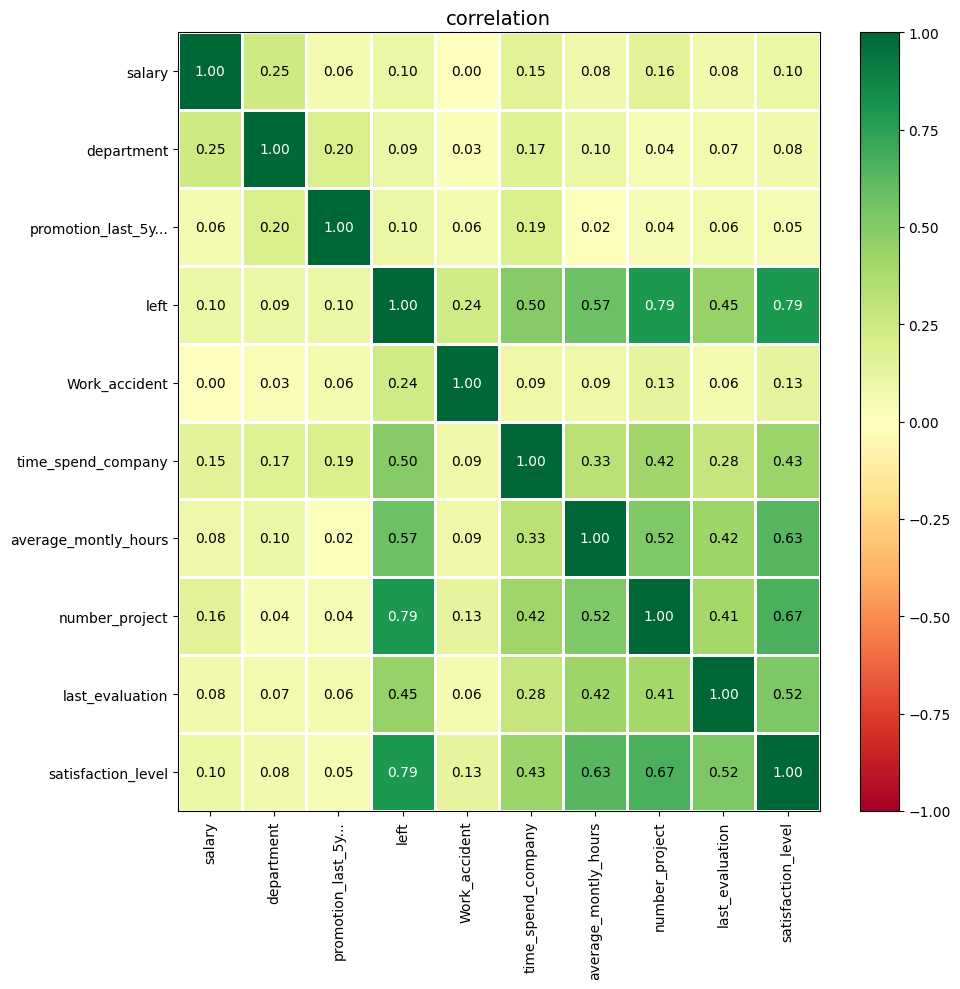

In [39]:
phik_matrix = df.phik_matrix()
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(10, 10))

In [40]:
categorical_list = [col for col in df.drop(['left'], axis=1).columns if df[col].nunique() <= 10]
non_categorical_list = [col for col in df.drop(['left'], axis=1).columns if df[col].nunique() > 10]

print(categorical_list)
print(non_categorical_list)

['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary']
['satisfaction_level', 'last_evaluation', 'average_montly_hours']


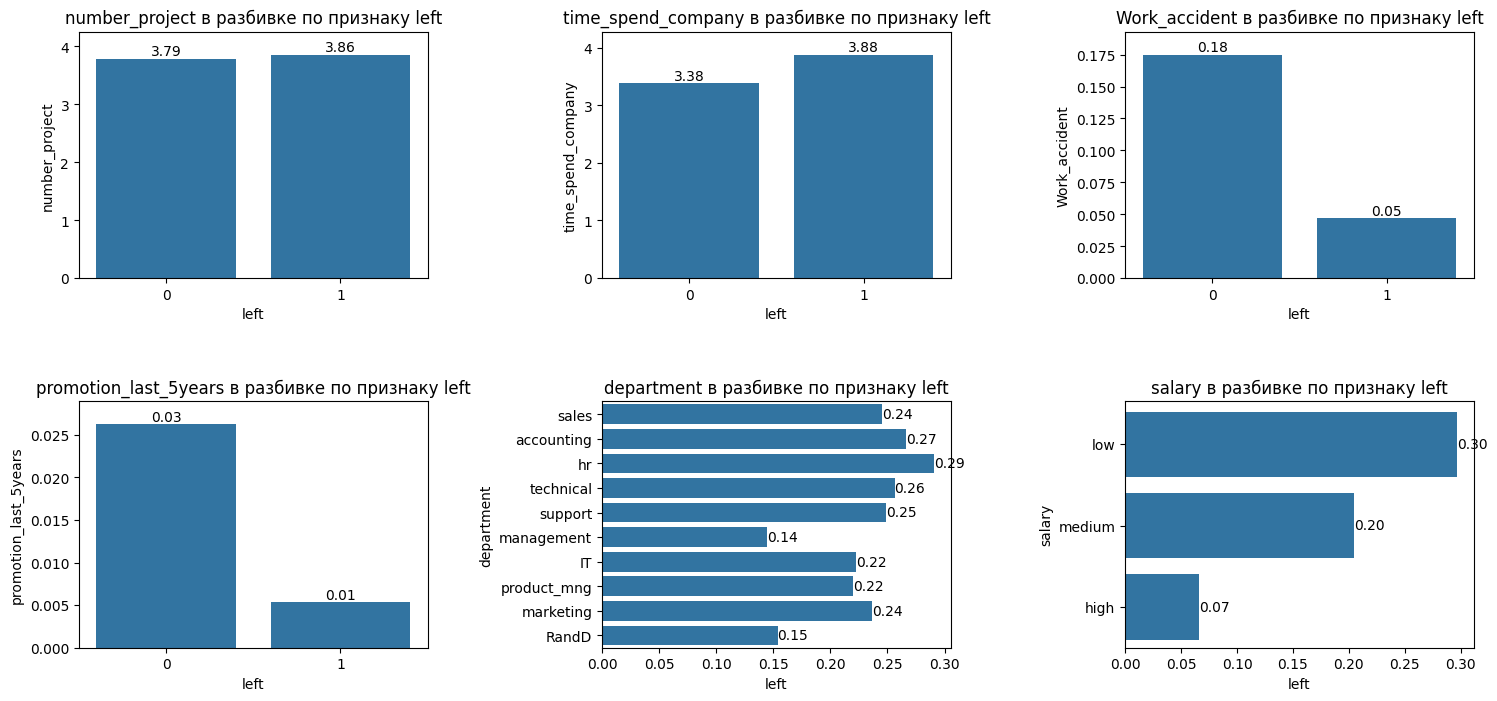

In [41]:
import math
# Определяем количество строк и столбцов в сетке
num_plots = len(categorical_list)
rows = math.ceil(num_plots / 3)  # Количество строк
cols = min(num_plots, 3)  # Количество столбцов

# Создаем сетку осей
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_list):
    ax = sns.barplot(data=df, x='left', y=col, ax=axes[i], errorbar=None)
    ax.set_title(f'{col} в разбивке по признаку left')
    bar_labels = [f"{value:.2f}" for value in ax.containers[0].datavalues]
    ax.bar_label(ax.containers[0], labels=bar_labels)
    # Настраиваем границы графика по оси y
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1] * 1.05)  # Увеличиваем верхнюю границу на 5 %

# Убираем лишние пустые оси
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Настраиваем отступы между графиками
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

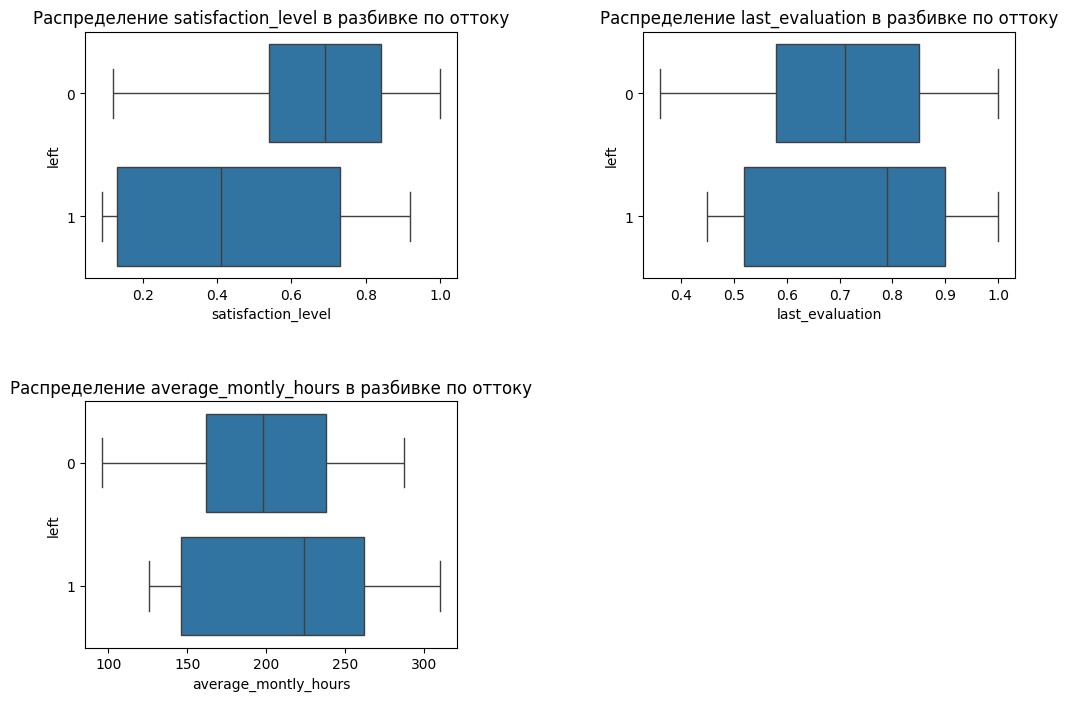

In [42]:
num_plots = len(non_categorical_list)
rows = math.ceil(num_plots / 2)
cols = min(num_plots, 2)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(non_categorical_list):
    ax = sns.boxplot(data=df, orient='h', x=col, y='left', ax=axes[i])
    ax.set_title(f'Распределение {col} в разбивке по оттоку')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [44]:
def transform_dataframe(df):

  department_mapping = {
      'sales': 1,
      'accounting': 2,
      'hr': 3,
      'technical': 4,
      'support': 5,
      'management': 6,
      'IT': 7,
      'product_mng': 8,
      'marketing': 9,
      'RandD': 10
  }

  salary_mapping = {
      'low': 1,
      'medium': 2,
      'high': 3
  }

  df['department'] = df['department'].map(department_mapping).astype('int64')
  df['salary'] = df['salary'].map(salary_mapping).astype('int64')

  return df

transform_dataframe(df)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,5,1
14995,0.37,0.48,2,160,3,0,1,0,5,1
14996,0.37,0.53,2,143,3,0,1,0,5,1
14997,0.11,0.96,6,280,4,0,1,0,5,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


Исходный размер DataFrame: (14999, 10)
Размер целевой переменной (y): (14999,)
Уникальные значения в y: [1 0]
Размер DataFrame после One-Hot Encoding: (14999, 376)
Размер матрицы признаков (X): (14999, 375)
Размер X_train: (11999, 375)
Размер X_test: (3000, 375)
Размер y_train: (11999,)
Размер y_test: (3000,)
Уникальные значения в y_train: [0 1]
Уникальные значения в y_test: [0 1]
Размер X_train после масштабирования: (11999, 375)
Размер X_test после масштабирования: (3000, 375)
Точность модели: 0.9133333333333333
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2294
           1       0.87      0.74      0.80       706

    accuracy                           0.91      3000
   macro avg       0.90      0.85      0.87      3000
weighted avg       0.91      0.91      0.91      3000



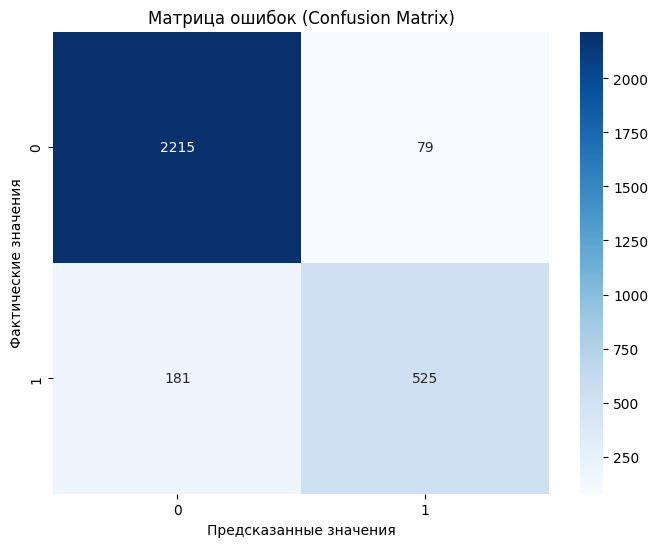

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np  # Добавлен импорт numpy


def train_lda_model(df, target_column='left', numeric_features=None, categorical_features=None, test_size=0.2, random_state=42):

    if numeric_features is None and categorical_features is None:
        raise ValueError("Необходимо указать хотя бы один числовой или категориальный признак.")

    # 1. Подготовка данных
    print("Исходный размер DataFrame:", df.shape)

    # Сохраняем целевую переменную до One-Hot Encoding
    y = df[target_column]
    print("Размер целевой переменной (y):", y.shape)
    print("Уникальные значения в y:", y.unique())  # Проверка уникальных значений

    # Обработка категориальных признаков (One-Hot Encoding) ДО разделения данных
    if categorical_features:
        df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
        print("Размер DataFrame после One-Hot Encoding:", df.shape)

    # Создание матрицы признаков (X) -  исключаем целевую переменную
    X = df.drop(target_column, axis=1)
    print("Размер матрицы признаков (X):", X.shape)

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    print("Размер X_train:", X_train.shape)
    print("Размер X_test:", X_test.shape)
    print("Размер y_train:", y_train.shape)
    print("Размер y_test:", y_test.shape)
    print("Уникальные значения в y_train:", y_train.unique())  # Проверка уникальных значений
    print("Уникальные значения в y_test:", y_test.unique())  # Проверка уникальных значений

    # Обработка числовых признаков (масштабирование) - ПОСЛЕ разделения
    if numeric_features:
        scaler = StandardScaler()  # Для числовых данных рекомендуется масштабирование
        X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
        X_test[numeric_features] = scaler.transform(X_test[numeric_features])
        print("Размер X_train после масштабирования:", X_train.shape)
        print("Размер X_test после масштабирования:", X_test.shape)

    # Обучение модели
    model = LinearDiscriminantAnalysis()
    try:
      model.fit(X_train, y_train)
    except Exception as e:
      print(f"Ошибка при обучении модели: {e}")
      return None, None

    # Предсказание и оценка

    y_pred = model.predict(X_test)  # Предсказание на тестовой выборке

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Точность модели: {accuracy}")
    print("Отчет о классификации:\n", report)

    # Матрица ошибок (Confusion Matrix)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Матрица ошибок (Confusion Matrix)')
    plt.ylabel('Фактические значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

    return model, y_pred

model, predictions = train_lda_model(df, numeric_features=categorical_list, categorical_features=non_categorical_list, target_column='left')

10. Загрузить jupyter notebook с решение на github и прислать ссылку